# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [36]:
df = pd.read_csv("marketing campaign.csv")
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,7270,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,8235,1956,24-01-2014,8,30,214,80,30,6,10,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


In [38]:
# удаляем ID, потому что идентификатор как правило ни от чего не зависит и не влияет на результат
df = df.drop('ID', axis=1)

In [39]:
# преобразуем дату к datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [40]:
# Количества дней, прошедших со дня регистрации на сайте до максимальной даты в датасете
df['days_registered'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [41]:
# Возраст, как количество лет от года рождения до максимального года регистрации в датасете
df['age'] = df['Dt_Customer'].dt.year.max() - df['Year_Birth']

In [42]:
# Удаляем признаки, которые больше не имеют смысла в датасете (так как вместо них используются более информативные)
df = df.drop(['Dt_Customer', 'Year_Birth'], axis=1)

In [9]:
df.corr()

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,days_registered,age
Recency,1.000000,-0.004306,0.023056,0.001079,0.022670,-0.010726,0.000799,-0.198437,0.024522,0.019871
MntFruits,-0.004306,1.000000,0.543105,0.594804,0.567164,0.296735,0.461758,0.125289,0.066928,0.017917
MntMeatProducts,0.023056,0.543105,1.000000,0.568402,0.523846,0.293761,0.479659,0.236335,0.092713,0.030872
MntFishProducts,0.001079,0.594804,0.568402,1.000000,0.579870,0.293681,0.459855,0.111331,0.080769,0.041625
MntSweetProducts,0.022670,0.567164,0.523846,0.579870,1.000000,0.348544,0.448756,0.117372,0.081268,0.018133
NumWebPurchases,-0.010726,0.296735,0.293761,0.293681,0.348544,1.000000,0.502713,0.148730,0.191876,0.145040
NumStorePurchases,0.000799,0.461758,0.479659,0.459855,0.448756,0.502713,1.000000,0.039363,0.110592,0.128272
Response,-0.198437,0.125289,0.236335,0.111331,0.117372,0.148730,0.039363,1.000000,0.194481,-0.021325
days_registered,0.024522,0.066928,0.092713,0.080769,0.081268,0.191876,0.110592,0.194481,1.000000,-0.022431
age,0.019871,0.017917,0.030872,0.041625,0.018133,0.145040,0.128272,-0.021325,-0.022431,1.000000


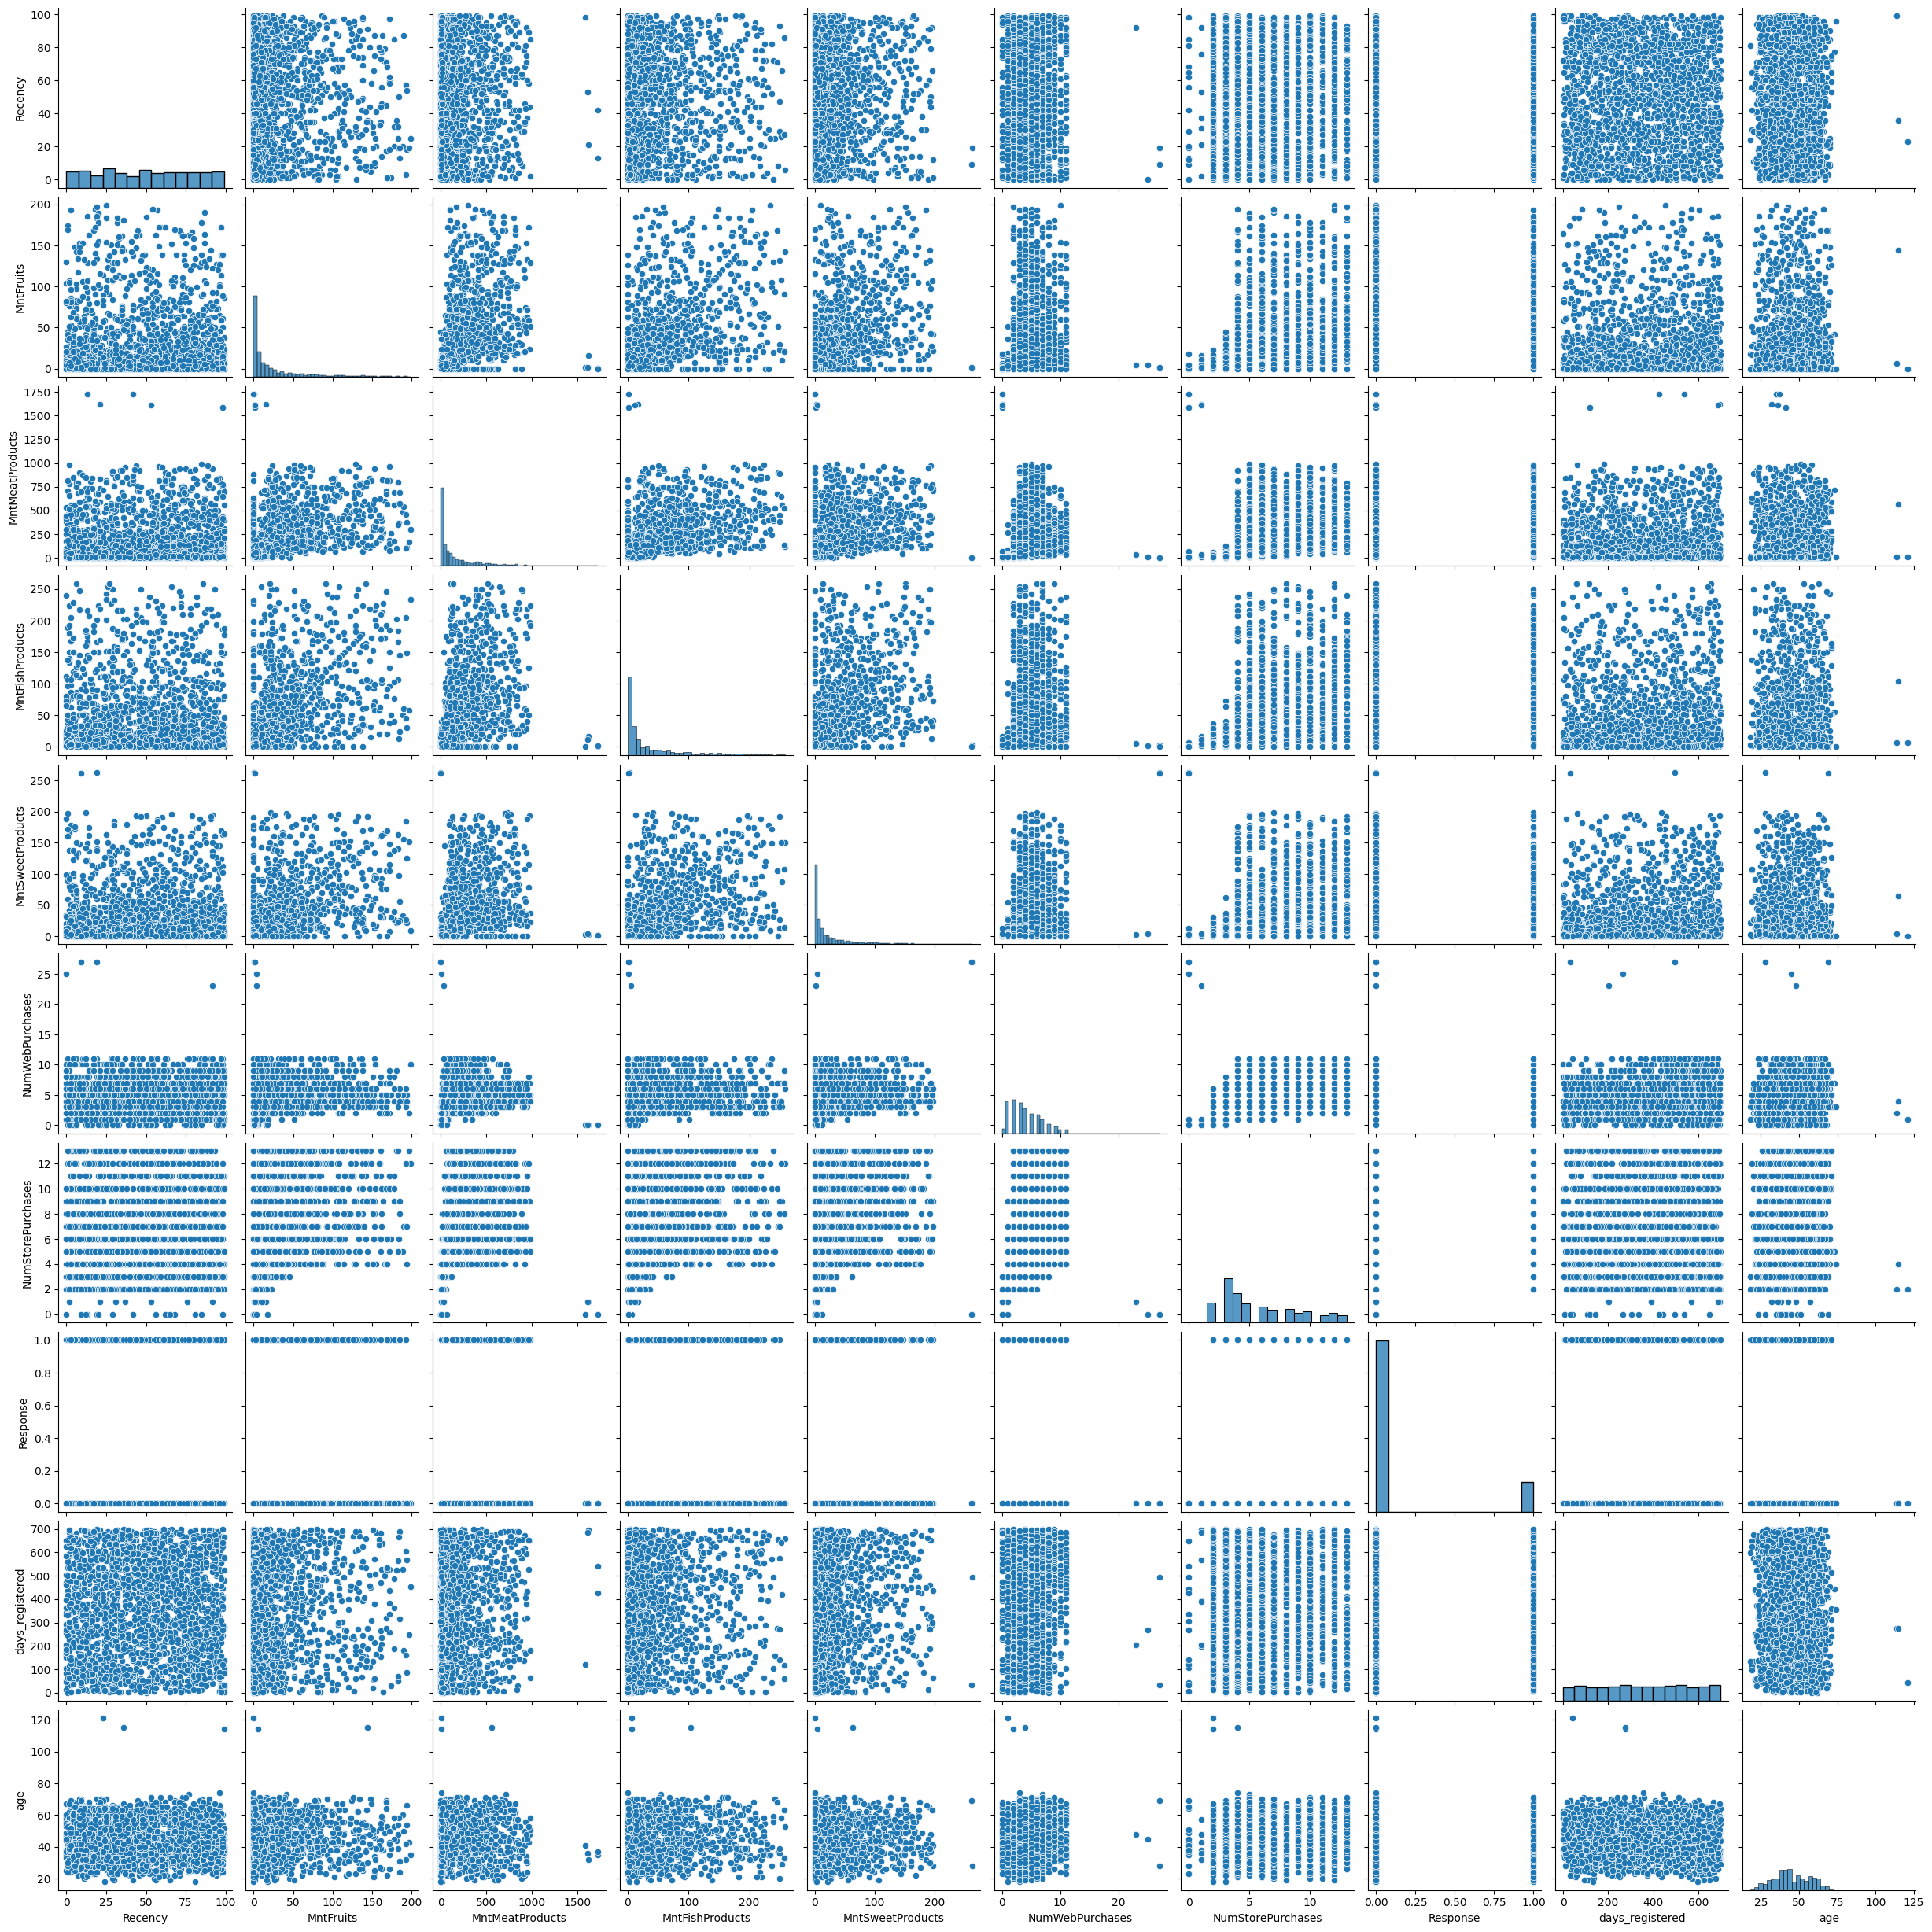

In [10]:
sns.pairplot(df)

В ходе разведочного анализа обнаружено, что сумма и объёмы покупок положительно коррелируют с другими покупками.

Количество дней последней покупки имеет небольшую положительную корреляцию с количеством дней с момента регистрации и числом покупок через сайт, и отрицательную корреляцию с Responce, но самую большую корреляцию Responce имеет с суммой покупок мяса.

Сумма, потраченная на сладости больше остальных коррелирует с покупками через сайт.

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

По результатам разведочного анализа явно определить количество кластеров сложно, но исходя из распределений отдельных признаков, можно предположить, что число кластеров от 2 * 2 * 2 = 6 до 4 * 2 * 4 * 3 * 3 * 3 * 3 * 3 = 7776, так как в каждом распределении (на глаз) можно выделить столько групп, а два признака имеют равномерное распределение.

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

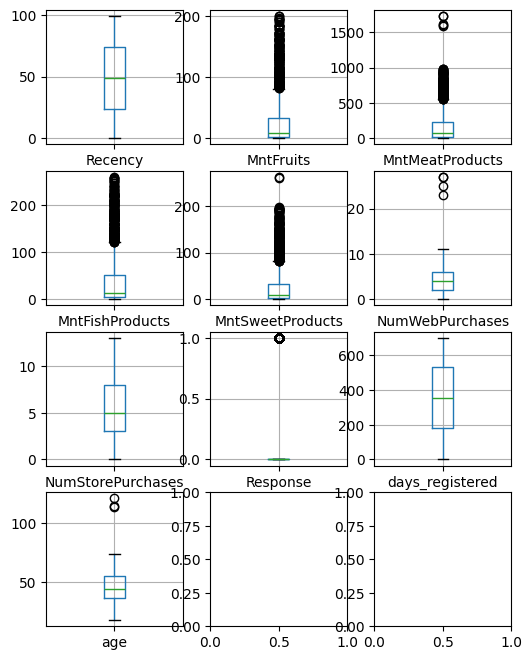

In [43]:
fig, ax = plt.subplots(len(list(df))//3 + 1, 3)
fig.set_figheight(8)
fig.set_figwidth(6)
for i, col in enumerate(list(df)):
    df[[col]].boxplot(ax=ax[i//3, i%3])


In [44]:
# Так как пропусков в данных нет, но есть выбросы, то можно заменить их на граничные значения ящика с усами 
# (по межквартильному расстоянию)
def replace_outliers(column):
    x = column.copy()
    q1, q3 = x.quantile(0.25), x.quantile(0.75)
    lb, rb = max(x.min(), q1 - 1.5*(q3 - q1)), min(x.max(), q3 + 1.5*(q3 - q1))
    x[x < lb] = lb
    x[x > rb] = rb
    return x

for col in ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 
            'NumWebPurchases', 'NumStorePurchases', 'age']:
    df[col] = replace_outliers(df[col])


C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_7968\2449536739.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '120.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[x > rb] = rb


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

Text(0, 0.5, 'Инерция')

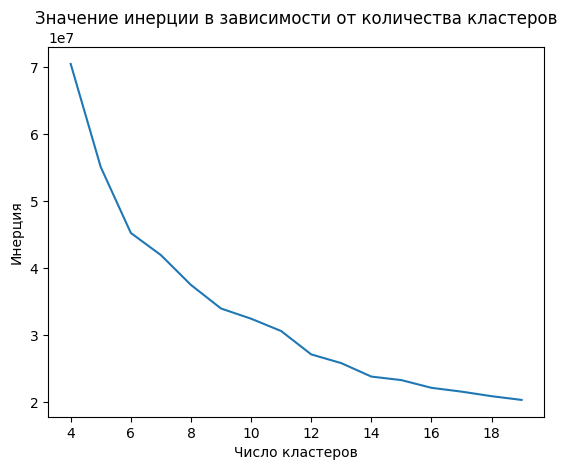

In [67]:
n_clusters = list(range(4, 20, 1))
metrics = []
for k in n_clusters:
    km = KMeans(k)
    km.fit(df)
    metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)
plt.title('Значение инерции в зависимости от количества кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')

Text(0, 0.5, 'Силуэт')

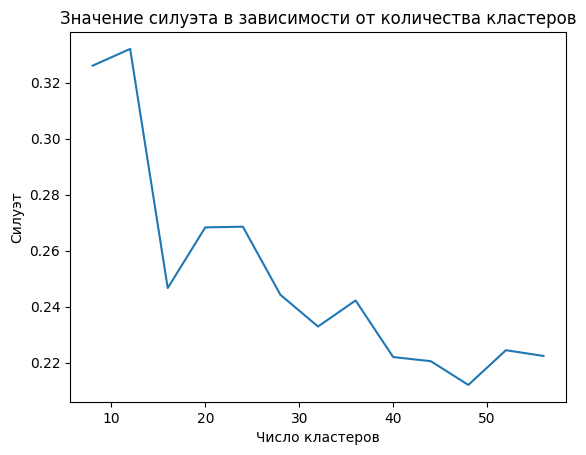

In [ ]:
n_clusters = list(range(4, 60, 2))
silhouettes = []
for k in n_clusters:
    km = KMeans(k)
    km.fit(df)
    silhouettes.append(silhouette_score(df, km.predict(df)))

sns.lineplot(x=n_clusters, y=silhouettes)
plt.title('Значение силуэта в зависимости от количества кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Силуэт')

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

In [30]:
km = KMeans(9)
df['cluster'] = km.fit_predict(df.drop(['cluster', 'x', 'y'], axis=1))

In [ ]:
# Выбираем такое значение perplexity, потому что при нём кластеры становятся визуально отделимыми на графике
tsne = TSNE(2, perplexity=12, n_jobs=-1)
df[['x', 'y']] = tsne.fit_transform(df.drop(['cluster', 'x', 'y'], axis=1))

<Axes: xlabel='x', ylabel='y'>

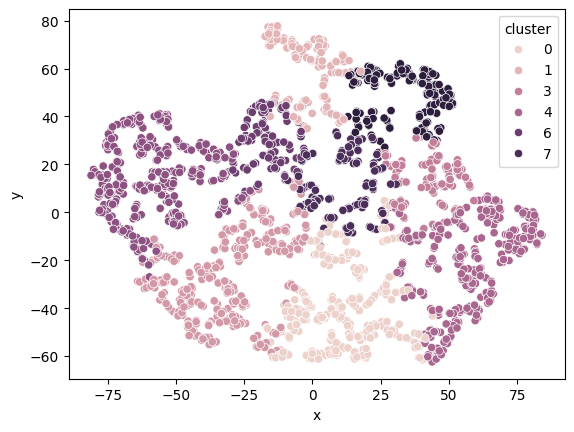

In [31]:
sns.scatterplot(x=df['x'], y=df['y'], hue=df['cluster'])

# Задание 6

Постройте профили кластеров и опишите их.

In [32]:
df.groupby('cluster').agg({col: ['mean', 'std'] for col in df.drop(['cluster', 'x', 'y'], axis=1)}).T

cluster                          0           1           2           3  \
Recency           mean   48.985755   48.143750   49.104439   47.977778   
                  std    28.117657   29.428914   29.253622   29.037666   
MntFruits         mean    8.518519   51.050000    8.443864   48.666667   
                  std    13.915421   28.909923   13.013539   28.625216   
MntMeatProducts   mean   42.769231  505.806250   42.428198  234.400000   
                  std    39.362793   61.719949   41.195161   68.490679   
MntFishProducts   mean   12.491453   75.734375   12.005222   64.762963   
                  std    19.513144   40.468558   19.358392   42.494505   
MntSweetProducts  mean    9.219373   52.493750    8.963446   50.814815   
                  std    15.348160   27.279129   15.318904   27.721748   
NumWebPurchases   mean    3.341880    4.775000    3.143603    6.903704   
                  std     2.504267    1.744533    2.292203    2.427683   
NumStorePurchases mean    4.330484    8.256250    4.516971    8.718519   
                  std     2.391451    2.761475    2.436438    2.784959   
Response          mean    0.099715    0.300000    0.052219    0.237037   
                  std     0.300047    0.459696    0.222760    0.426849   
days_registered   mean  434.096866  201.050000  265.793734  603.348148   
                  std    51.090248   97.265558   47.803226   57.864396   
age               mean   43.874644   46.512500   44.545692   47.562963   
                  std    11.372961   14.244049   11.024598   10.957589   

cluster                          4          5           6           7  \
Recency           mean   50.507003  47.836735   48.103704   48.369863   
                  std    28.947804  29.219320   29.123329   27.879795   
MntFruits         mean   10.296919   5.839286   49.340741   39.294521   
                  std    15.173207  10.455468   28.594479   27.478686   
MntMeatProducts   mean   52.106443  29.466837  280.511111  225.910959   
                  std    44.007148  34.128746   77.758223   67.470139   
MntFishProducts   mean   15.170868   7.968112   71.740741   66.726027   
                  std    22.601772  14.859646   41.296428   39.637977   
MntSweetProducts  mean    9.868347   5.943878   47.051852   40.308219   
                  std    14.851589  11.502114   27.101060   26.808019   
NumWebPurchases   mean    3.862745   2.816327    5.155556    6.184932   
                  std     2.609552   2.222171    2.304657    2.345953   
NumStorePurchases mean    4.705882   4.056122    8.377778    9.000000   
                  std     2.637307   2.315723    2.828075    2.957165   
Response          mean    0.226891   0.056122    0.088889    0.116438   
                  std     0.419409   0.230452    0.285643    0.321854   
days_registered   mean  608.806723  86.678571  123.007407  393.698630   
                  std    52.597733  48.787694   75.874257   67.369631   
age               mean   44.224090  44.686224   46.518519   49.945205   
                  std    11.474945  11.073390   12.274748   11.443282   

cluster                          8  
Recency           mean   52.403315  
                  std    29.951401  
MntFruits         mean   51.027624  
                  std    27.002558  
MntMeatProducts   mean  514.453039  
                  std    56.313056  
MntFishProducts   mean   78.066298  
                  std    41.205731  
MntSweetProducts  mean   50.403315  
                  std    29.380413  
NumWebPurchases   mean    5.198895  
                  std     2.355655  
NumStorePurchases mean    8.325967  
                  std     2.943701  
Response          mean    0.370166  
                  std     0.484188  
days_registered   mean  546.016575  
                  std    97.763290  
age               mean   43.812155  
                  std    12.931790

В кластерах 1, 3, 6, 7 и 8 большая средняя сумма покупок любой категории.

Больше всего потратили на мясо в кластерах 1 и 8.

Больше всего покупок на сайте совершено в кластерах 3 и 7, а в магазинах - в кластерах 1, 3, 6, 7 и 8.

Больше всего откликнувшихся на рекламную кампанию в кластерах 1 и 8.

Наименьшее среднее кол-во дней с момента регистрации в кластерах 1, 2, 5 и 6.

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

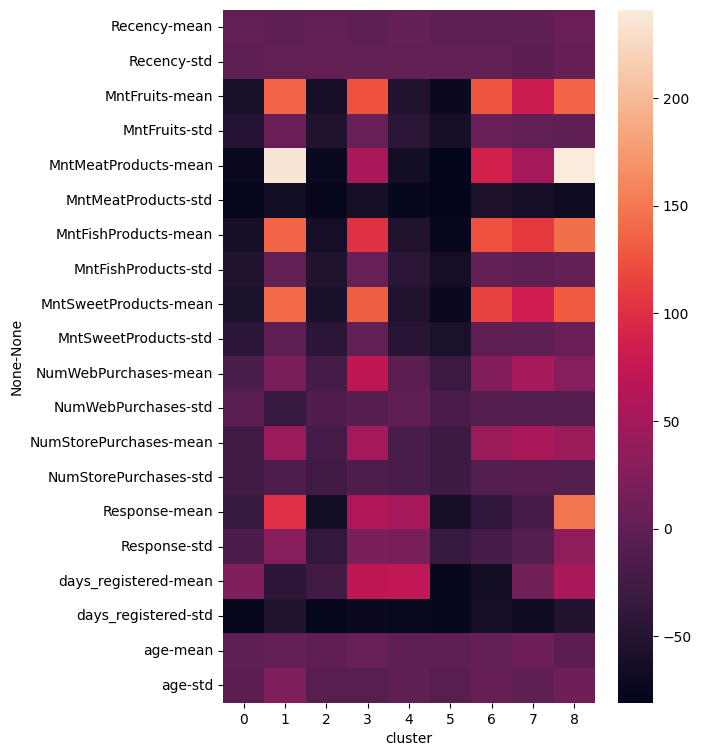

In [33]:
df_rel = df.groupby('cluster').agg({col: ['mean', 'std'] for col in df.drop(['cluster', 'x', 'y'], axis=1)}).T
df_rel['global'] = np.array([[df[feature].apply(f) for f in ['mean', 'std']]
                             for feature in df.drop(['cluster', 'x', 'y'], axis=1)]).flatten()
for cluster in sorted(df['cluster'].unique()):
    df_rel[cluster] = 100 * df_rel[cluster] / df_rel['global'] - 100

plt.figure(figsize=(6, 9))
sns.heatmap(df_rel.drop('global', axis=1));

Кластеры 0, 2, 4, 5 - неактивные покупатели.

Кластер 4 - неактивные покупатели, зарегистрированные давно и участвовавшие в рекламной кампании, в кластере 5 же недавно зарегистрированные, причины неактивности которых стоит изучить (возможно не сработала реклама).

Кластеры 1 и 8 - целевая аудитория, т. е. люди, которые больше всего покупают, и участвовали в рекламной кампании, их стоит удержать.

Кластеры 3 и 7 - больше остальных покупают через сайт, откикнулись на рекламу, но сумма покупки мяса у них ниже, чем у тех, кто закупался через сайт не так активно. Возможно стоит разработать другую рекламную кампанию для сайта.

Кластер 6 - недавние, не откликнувшиеся на рекламу.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.